<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW3 – Arnav Bhatia

Course: MAT 421

Date: January 27 , 2025


17.4 Lagrange Polynomial Interpolation

Concept Explanation

Lagrange Polynomial Interpolation produces a single polynomial L(x) of degree n−1 that exactly passes through n data points.

The polynomial is formed as a linear combination of Lagrange basis polynomials, each of which is zero at all data points except one.

One caution is that Lagrange polynomials can oscillate significantly outside the range of the given data points (i.e., extrapolation can be unreliable).




Example 1: Manual Construction of Lagrange Basis Polynomials

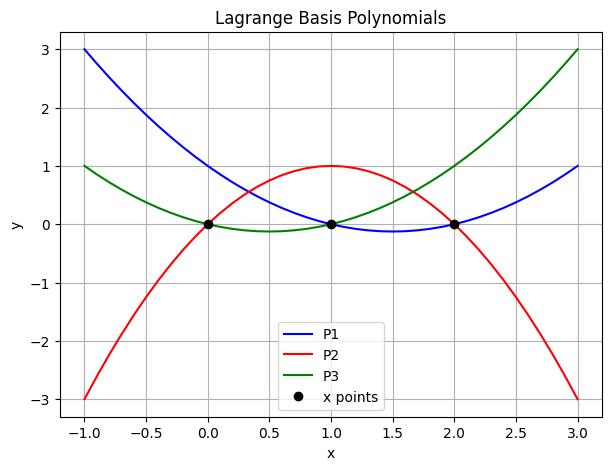

In [1]:
# In [1]:

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Example data points
x_points = [0, 1, 2]
y_points = [1, 3, 2]

# We'll construct the individual Lagrange basis polynomials manually.
# These polynomials are determined so that:
# L1(x0)=1, L1(x1)=0, L1(x2)=0; L2(x0)=0, L2(x1)=1, etc.
# For demonstration, we define them via coefficients for polynomial.Polynomial:

P1_coeff = [1, -1.5, 0.5]   # 0.5(x^2 - 3x + 2)
P2_coeff = [0, 2, -1]       # -x^2 + 2x
P3_coeff = [0, -0.5, 0.5]   # 0.5(x^2 - x)

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1, 3.1, 0.1)

plt.figure(figsize=(7,5))
plt.plot(x_new, P1(x_new), 'b', label='P1')
plt.plot(x_new, P2(x_new), 'r', label='P2')
plt.plot(x_new, P3(x_new), 'g', label='P3')

# Plot reference lines at x-values
plt.plot(x_points, np.zeros(len(x_points)), 'ko', label='x points')

plt.title("Lagrange Basis Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


Each basis polynomial Pi is 1 at xi and 0 at the other data points.

Example 2: Summation to Form the Lagrange Polynomial

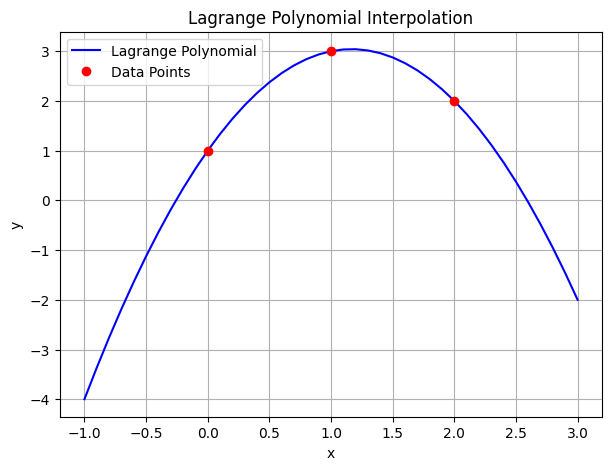

In [2]:
# In [2]:

# Multiply each basis polynomial by the corresponding y-value and sum them up
L = (y_points[0]*P1) + (y_points[1]*P2) + (y_points[2]*P3)

# Evaluate L on a dense set of x-values
y_L = L(x_new)

plt.figure(figsize=(7,5))
plt.plot(x_new, y_L, 'b-', label='Lagrange Polynomial')
plt.plot(x_points, y_points, 'ro', label='Data Points')
plt.title("Lagrange Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


The polynomial passes exactly through (0,1), (1,3), and (2,2). If we evaluate it at those x-values, we'll get the original y values.

17.5 Newton’s Polynomial Interpolation

Concept Explanation

Newton’s Polynomial Interpolation also constructs a polynomial that passes through all data points, but it uses a different form that often makes it easier to add new points without completely recalculating everything.

It relies on divided differences to compute coefficients.


Example: Newton Polynomial via Divided Differences

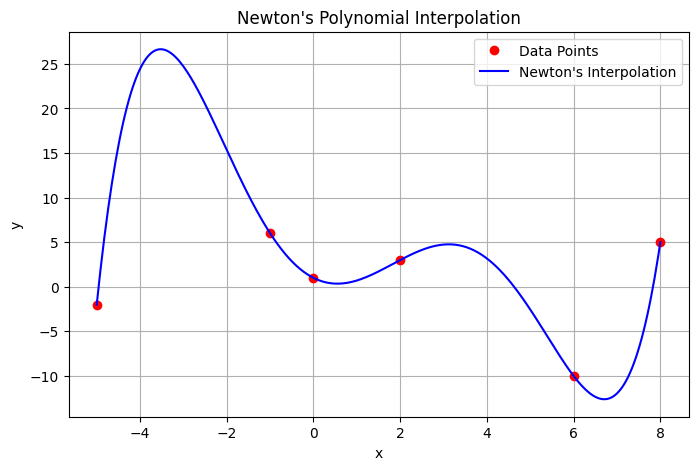

In [3]:
# In [4]:

import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    """
    Build the divided difference table for points x, y.
    Return the top row (first element) of each column as coefficients.
    """
    n = len(x)
    coef = np.zeros([n, n])
    # First column is just y
    coef[:,0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    return coef

def newton_poly(coef, x_data, x):
    """
    Evaluate the Newton polynomial with given 'coef' (divided diffs)
    and x_data at points x.
    """
    n = len(x_data) - 1
    p = coef[0, n]  # Start from the top-right corner
    for k in range(1, n+1):
        p = coef[0, n-k] + (x - x_data[n-k]) * p
    return p

# Example data
x_vals = np.array([-5, -1, 0, 2, 6, 8])
y_vals = np.array([-2, 6, 1, 3, -10, 5])

# Calculate the divided difference coefficients
coef_table = divided_diff(x_vals, y_vals)

# Evaluate the polynomial on a fine grid
x_eval = np.linspace(-5, 8, 300)
y_eval = newton_poly(coef_table, x_vals, x_eval)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, 'ro', label="Data Points")
plt.plot(x_eval, y_eval, 'b-', label="Newton's Interpolation")
plt.title("Newton's Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


The polynomial exactly matches each data point. The method also provides a systematic way to add additional points without recalculating everything from scratch.

Conclusion

Lagrange Interpolation: A single polynomial of degree n−1 formed from special basis polynomials. Straightforward but can be computationally cumbersome for large n.

Newton’s Polynomial Interpolation: Also yields a single polynomial, but uses divided differences. The factorized form can be more efficient for adding new data points.

Both methods guarantee the resulting polynomial will pass through all the data points.